In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/Ayushi/Desktop/BCI.csv")

In [3]:
data.head()

,Left,Right,Label
0,0.003592,0.084657,1
1,0.038535,0.593544,1
2,0.245780,-0.165760,1
3,0.000000,0.562434,1
4,0.038782,0.374850,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [6]:
X_train = training_set.iloc[:,0:2].values

In [7]:
Y_train = training_set.iloc[:,2].values

In [8]:
X_test = test_set.iloc[:,0:2].values

In [9]:
Y_test = test_set.iloc[:,2].values

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', random_state = 1)
classifier.fit(X_train,Y_train)

C:\Users\Ayushi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
Y_pred = classifier.predict(X_test)

In [12]:
test_set["Predictions"] = Y_pred

C:\Users\Ayushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.75


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[ 7 12]
 [ 0 29]]


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

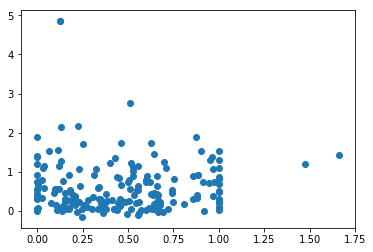

In [15]:
X = np.array(X_train)
y = np.array(Y_train)
plt.scatter(X[:, 0], X[:, 1])

In [16]:
clf = SVC(kernel='linear')
clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

(-1.165760152, 5.860175218)

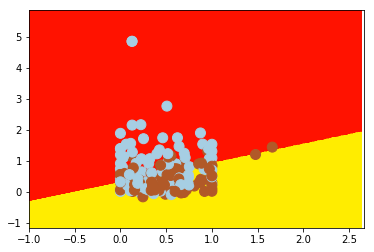

In [17]:
# Stepsize
h=.02 

# Define the borders of our grid using maxima from X and y
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Define the grid with the useful meshgrid function
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.autumn, alpha=1)


# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=100)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [20]:
from array import *

    
# driver code 
l_c = X_test[:,0].tolist() 
r_c = X_test[:,1].tolist()
actual = Y_test.tolist()
pred = Y_pred.tolist()



In [21]:
import xlwt
from tempfile import TemporaryFile
book = xlwt.Workbook()
sheet1 = book.add_sheet('sheet1')


for i,e in enumerate(l_c):
    sheet1.write(i,0,e)
    
for i,e in enumerate(r_c):
    sheet1.write(i,1,e)
    
for i,e in enumerate(actual):
    sheet1.write(i,2,e)
    
for i,e in enumerate(pred):
    sheet1.write(i,3,e)

name = "C:/Users/Ayushi/Desktop/BCIjugaad.xlsx"
book.save(name)
book.save(TemporaryFile())
